### CAMs Distance from KL + Centroid Algorithms

1. KL Divergence (Kullback–Leibler)

Measure how much a probability distribution is different than other from the map intensities.

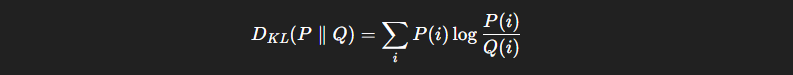

Interpretation:

- P: Default map
- Q: Target map
- 0: Identical maps
- Bigest values: Different maps

2. Centroid Distance (distance between centers of mass)
Measure de focal distance difference between two maps from the weighted midpoint.

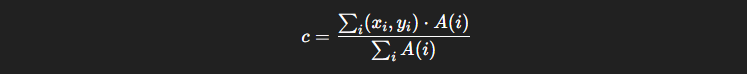

Interpretation:
- 0: Focus in same place
- Bigest Values: Greater distances

In [ ]:
import numpy as np
import cv2
from scipy.stats import entropy
from scipy.ndimage import gaussian_filter
import glob

def load_heatmap(path, size=(256,256)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    img = cv2.resize(img, size)
    img = gaussian_filter(img, sigma=1.0)
    img /= img.sum() + 1e-12  # normaliza para soma=1
    return img

def kl_divergence(p, q):
    p = np.clip(p, 1e-12, 1.0)
    q = np.clip(q, 1e-12, 1.0)
    return float(entropy(p.flatten(), q.flatten()))

def centroid_distance(a, b):
    h, w = a.shape
    y, x = np.indices((h, w))
    def centroid(img):
        s = img.sum()
        return np.array([(y * img).sum()/s, (x * img).sum()/s])
    ca, cb = centroid(a), centroid(b)
    return float(np.linalg.norm(ca - cb))

# exemplo
ref = load_heatmap('gabarito.png')
scores = []
for path in glob.glob('heatmaps/*.png'):
    img = load_heatmap(path)
    kl = kl_divergence(ref, img)
    cd = centroid_distance(ref, img)
    scores.append((path, kl, cd))

# ordenar: menor KL e menor centroid → mais parecido
scores.sort(key=lambda x: (x[1], x[2]))

for p, kl, cd in scores:
    print(f"{p}: KL={kl:.4f}  CentroidDist={cd:.2f}")


To merge all metrics:

In [ ]:
score = np.exp(-kl) * np.exp(-cd / 10)
